In [1]:
from konlpy.tag import Kkma , Komoran , Okt
from collections import Counter
import matplotlib.pyplot as plt
import re

plt.style.use('default')

import pandas as pd
import numpy as np

In [2]:
kmoran = Komoran()

In [3]:
#okt = Okt()

In [4]:
data = pd.read_excel('./preprocessing/emotion_labels(ko).xlsx')
del data['Unnamed: 0']

In [5]:
data = data[data['emotion'].notnull() & data['emotion'] != 0]

In [11]:
data['emotion'].value_counts()

1.0    2279
3.0    2004
4.0    1309
6.0    1061
2.0    1037
5.0     896
Name: emotion, dtype: int64

In [5]:
data[data['emotion'] == 1]

,lyrics splited,emotion,language
1,봄과 가을처럼 귀한 너의 미소가,1.0,k
11,쉽게 잠을 잘 수도 없는 이 밤에,1.0,k
16,산소 같은 너 내게 너란 존재가,1.0,k
18,거리에 서서 생각하며,1.0,k
24,너랑 나랑 너랑 나 단 둘이 불꽃놀이 갈래,1.0,k
...,...,...,...
53771,그대 지금 어딜 바라보는지 대체 지금 무슨 생각하는지,1.0,k
53796,너의 화려한 겉모습보다,1.0,k
54388,너의 그 눈빛이 눈빛이,1.0,k
54719,Baby 오늘만큼은 제발 날 놓치지마,1.0,k


In [13]:
emotion = {'thrill' : '' ,'love' : '' ,'enjoy' : '' ,'sad' : '' ,'angry': '','empty': ''}

In [14]:
for i in range(len(emotion)):
    emotion_df = data[data['emotion'] == i+1]
    corpus = " ".join(emotion_df['lyrics splited'].values)
    emotion[list(emotion.keys())[i]] = corpus

In [15]:
# 어절 단위로 분석하기
# for i in emotion_df['lyrics splited'].values[:10]:
#     print(okt.phrases(i))

In [16]:
#코모란 형태소 분석기
def emotion_tokenizer(corpus):
    temp = []
    for i in kmoran.pos(corpus):
        if (i[1] == 'NNG' or i[1] == 'NNP'or i[1] == 'NNB' or i[1] == 'MAG' or i[1] == 'IC'):
            temp.append(i[0])
        elif (i[1] == 'VV' or i[1] == 'VA'):
            temp.append(i[0] + "다")
        elif (i[1] == 'SL'):
            temp.append(i[0].lower())
    return temp

In [23]:
test = ['사랑을 잃은 이마음을',
       '후회는 없잖아 그렇게 이유 없이 사랑했잖아',
       '재미있게 듣던 말 이 책 중에 있으니',
       '이렇게 지껄여도 아무 의미 없다.',
       '가만히 있어도 내 생각은 하는지']

In [24]:
for i in test:
    print(emotion_tokenizer(i))

['사랑', '잃다', '마음']
['후회', '없다', '그렇다', '이유', '없이', '사랑']
['재미있다', '듣다', '말', '책', '중', '있다']
['이렇다', '지껄이다', '의미', '없다']
['가만히', '있다', '생각', '하다']


In [17]:
emotion_count = {}
vocab = {}
for i in range(len(emotion)):
    emotion_key = list(emotion.keys())[i]
    emotion_count[emotion_key] = Counter(emotion_tokenizer(emotion[emotion_key])).most_common(1000)
    for words , counts in emotion_count[emotion_key]:
        if words in list(vocab.keys()):
            vocab[words][emotion_key] = counts
        else:
            vocab[words] = {emotion_key : counts }

In [18]:
emotion_keys = list(emotion.keys())
for word in list(vocab.keys()):
    total = sum(vocab[word].values())
    for keys in emotion_keys:
        try:
            vocab[word][keys] = round( (vocab[word][keys]  / total) , 2 )
        except KeyError:
            pass

In [19]:
sum(vocab['있다'].values())

1.01

In [20]:
vocab

{'있다': {'thrill': 0.36,
  'love': 0.14,
  'enjoy': 0.22,
  'sad': 0.14,
  'angry': 0.04,
  'empty': 0.11},
 '보다': {'thrill': 0.41,
  'love': 0.07,
  'enjoy': 0.15,
  'sad': 0.14,
  'angry': 0.1,
  'empty': 0.12},
 '하다': {'thrill': 0.21,
  'love': 0.1,
  'enjoy': 0.19,
  'sad': 0.2,
  'angry': 0.18,
  'empty': 0.12},
 '맘': {'thrill': 0.6,
  'love': 0.08,
  'enjoy': 0.05,
  'sad': 0.16,
  'angry': 0.04,
  'empty': 0.07},
 '나다': {'thrill': 0.22,
  'love': 0.09,
  'enjoy': 0.26,
  'sad': 0.19,
  'angry': 0.13,
  'empty': 0.12},
 '말': {'thrill': 0.31,
  'love': 0.13,
  'enjoy': 0.16,
  'sad': 0.16,
  'angry': 0.17,
  'empty': 0.06},
 '날': {'thrill': 0.3,
  'love': 0.13,
  'enjoy': 0.16,
  'sad': 0.18,
  'angry': 0.12,
  'empty': 0.12},
 '수': {'thrill': 0.29,
  'love': 0.08,
  'enjoy': 0.13,
  'sad': 0.21,
  'angry': 0.07,
  'empty': 0.22},
 '생각': {'thrill': 0.56,
  'love': 0.04,
  'enjoy': 0.11,
  'sad': 0.12,
  'angry': 0.09,
  'empty': 0.09},
 '눈': {'thrill': 0.58,
  'love': 0.09,
  'enjo

In [86]:
emotion_tokenizer(data['lyrics splited'][1])

['봄', '가을', '귀하다', '미소']

In [179]:
emotion_keys

['thrill', 'love', 'enjoy', 'sad', 'angry', 'empty']

In [20]:
def lexicon_emotion_clf(sentence):
    temp = Counter()
    for word in emotion_tokenizer(sentence):
        try:
            temp = temp + Counter(vocab[word])
        except KeyError:
            pass
#     emotion = list(temp.keys())
#     score = list(temp.values())
    
#     plt.pie(score, labels=emotion, autopct='%.1f%%')
#     plt.show()
    
    return [k for k,v in dict(temp).items() if max(dict(temp).values()) == v]

In [31]:
test = data.sample(10)
test

,lyrics splited,emotion,language
1699,우 꼭 나만 혼자인 것 같고,6.0,k
9212,언제나 같은 모습의 미소를 띨 때,1.0,k
1197,마주앉아서 술을 마신 너의 모습,4.0,k
8420,시간의 흐름은 너와 나는 반대로,4.0,k
4303,여린 마음은 점점 멀어질 때 마다,6.0,k
2813,때론 성공만을 바라던 내게 질책아닌 해결책을,3.0,k
2689,어딘가 몸이 불편하진 않을까란,4.0,k
34196,전화를 끊고 울고 있을 널 알면서도,4.0,k
3357,내가 신은 신발 blue suede,3.0,k
3650,눈 부시고 환히 빛나,1.0,k


In [56]:
#단어사전 저장
np.save('emotion_vocab.npy', vocab)

In [66]:
pd.DataFrame({'word' : list(vocab.keys())}).to_excel('vocab.xlsx',index=False)

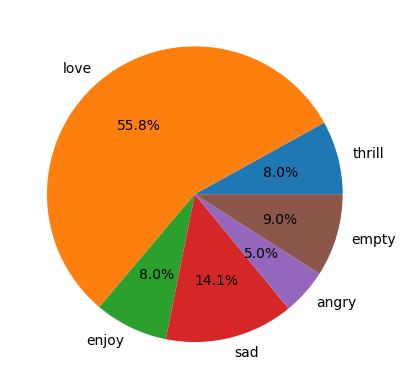

['love']

In [80]:
lexicon_emotion_clf("너무 사랑해")

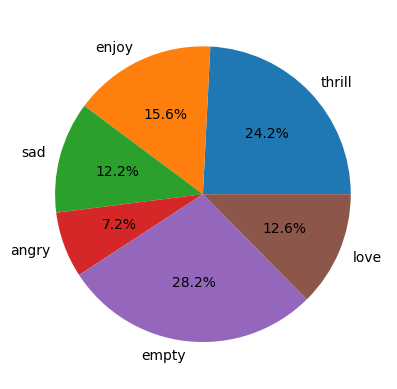

['empty']
우 꼭 나만 혼자인 것 같고


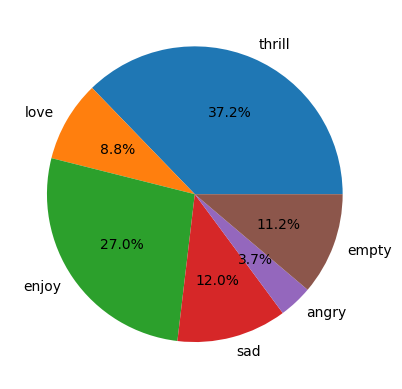

['thrill']
언제나 같은 모습의 미소를 띨 때


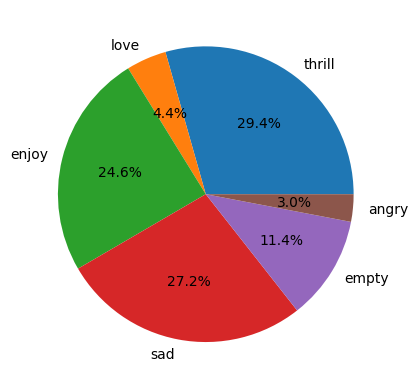

['thrill']
마주앉아서 술을 마신 너의 모습


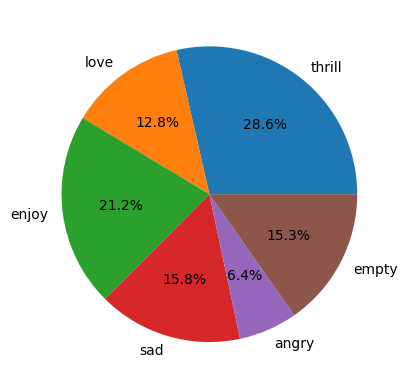

['thrill']
시간의 흐름은 너와 나는 반대로


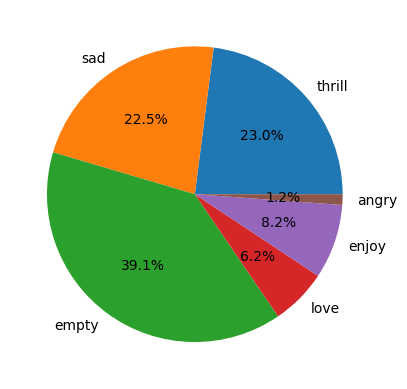

['empty']
여린 마음은 점점 멀어질 때 마다


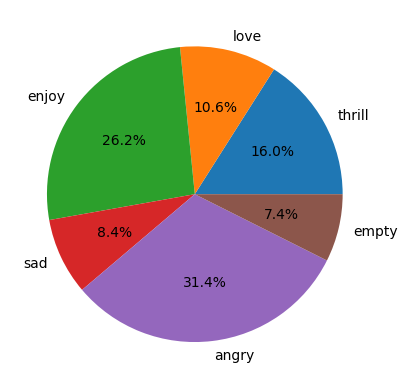

['angry']
때론 성공만을 바라던 내게 질책아닌 해결책을


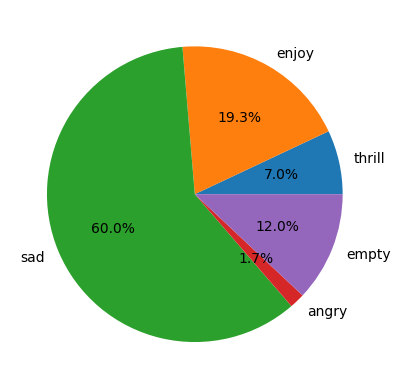

['sad']
어딘가 몸이 불편하진 않을까란


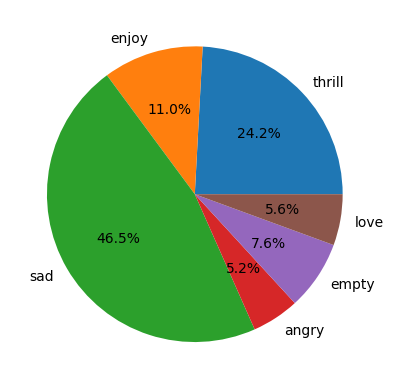

['sad']
전화를 끊고 울고 있을 널 알면서도


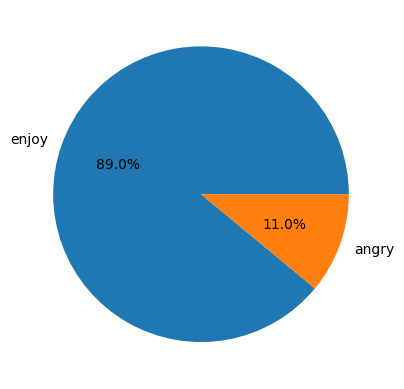

['enjoy']
내가 신은 신발 blue suede


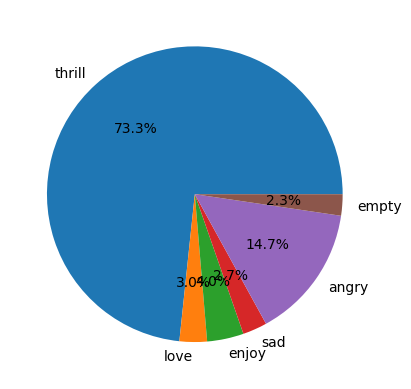

['thrill']
눈 부시고 환히 빛나


In [32]:
for i in test['lyrics splited']:
    print(lexicon_emotion_clf(i))
    print(i)

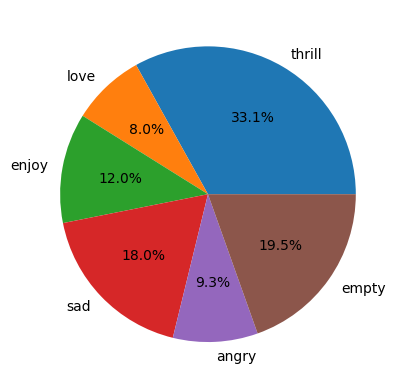

['thrill']

In [33]:
# 반어법 테스트
lexicon_emotion_clf("거짓없는 그대의 미소가 너무 초라해보여")